# Data understanding and Exploratory analysis (EDA)
## Topic: Examining the ecological processes influencing the assembly of molecules into OM assemblages


Dataset: 2 March 2022 from GDrive
(1) CF for SED and Water: https://drive.google.com/drive/folders/1hm4YNib_kI5Y4k7xp4E47w8qDjUIsagA?usp=sharing
(2) Metadata:

## Data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
fn_sed = "../Dataset/Sediment_Prevalence_10__commat_2021-09-29.csv"
fn_water = "../Dataset/Water_Prevalence_10__commat_2021-09-29.csv"
df_sed = pd.read_csv(fn_sed)
print('Sediment: ' + str(df_sed.shape))

df_water = pd.read_csv(fn_water)
print('Water: ' + str(df_water.shape))

# Data quality check
print(df_sed.columns.nunique())
print(df_water.columns.nunique())

# Check how many overlapping CF
print(len(set(df_sed.columns).intersection(set(df_water.columns))))

# Join datasets
df = pd.concat([df_sed, df_water], join="outer")
print(df.shape)

# Check if there is any identical columns / CF across all samples
print("Duplicated column: " + str(df.columns.duplicated().any()))

# Pre-processing
df = df.rename(columns={"Unnamed: 0": "sample_id"})
df = df.set_index("sample_id").fillna(0).reset_index()
df['type'] = df['sample_id'].str.split('_').str[0]
df['location'] = df['sample_id'].str.split('_').str[-2]
print(df.shape)
df.head()

Sediment: (239, 4053)
Water: (265, 4936)
4053
4936
2109
(504, 6880)
Duplicated column: False
(504, 6882)


,sample_id,C10H10O5,C10H10O5N4,C10H10O6,C10H10O6N4,C10H10O7,C10H10O8,C10H11O4N5,C10H11O5N,C10H11O5N5,...,C9H16O5S,C9H16O9N4S,C9H20O5NS2P,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N,type,location
0,SED_S19S.0001_D_Field,1,1.0,1,1.0,1,1,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,D
1,SED_S19S.0001_M_Field,1,1.0,1,1.0,1,1,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,M
2,SED_S19S.0001_U_Field,1,1.0,1,1.0,1,0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,U
3,SED_S19S.0003_D_Field,1,0.0,1,0.0,1,1,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,D
4,SED_S19S.0003_M_Field,1,0.0,0,0.0,0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SED,M


In [3]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['type','location']]).toarray())
encoder_df.columns = ['SED','SW','D','M','U']
#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df).set_index('sample_id')
final_df.drop(['type', 'location'], axis='columns', inplace=True)
final_df = final_df.apply(pd.to_numeric).astype(int)
final_df.head()

,C10H10O5,C10H10O5N4,C10H10O6,C10H10O6N4,C10H10O7,C10H10O8,C10H11O4N5,C10H11O5N,C10H11O5N5,C10H11O6N,...,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N,SED,SW,D,M,U
sample_id,,,,,,,,,,,,,,,,,,,,,
SED_S19S.0001_D_Field,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
SED_S19S.0001_M_Field,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
SED_S19S.0001_U_Field,1,1,1,1,1,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
SED_S19S.0003_D_Field,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
SED_S19S.0003_M_Field,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [4]:
#final_df.to_csv('all.csv')

In [5]:
col = ['SED','SW','D','M','U']
final_df[col].value_counts()

SED  SW  D  M  U
0    1   0  0  1    265
1    0   0  1  0     83
            0  1     80
         1  0  0     76
dtype: int64

In [6]:
temp = final_df.groupby(col).sum().reset_index(drop=True).T
temp.head(5)

,0,1,2,3
C10H10O5,245,74,75,71
C10H10O5N4,0,60,63,53
C10H10O6,250,69,66,63
C10H10O6N4,0,42,41,40
C10H10O7,234,60,53,54


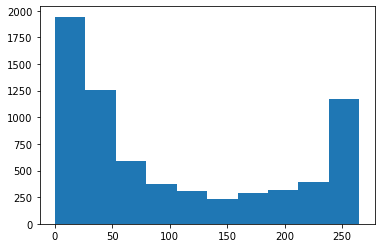

In [7]:
plt.hist(temp[0])
plt.show()

## CF and class by site

In [97]:
crosstab = pd.read_csv('../Dataset/Water_Prevalence_10_crosstable_2021-09-29.csv')
crosstab = crosstab.rename(columns={'Unnamed: 0': 'CF'}).set_index('CF')
col = ['Class','bs1_class','bs2_class','bs3_class']

temp = df_water.T
temp.columns = temp.iloc[0]
siteids = temp.columns 
temp = temp[1:]
temp = temp.join(crosstab[col])

# Applying the condition
cnt = 0
for i in siteids:
    cnt = cnt + 1
    if cnt%50==0:
        print(cnt)
    temp[i] = temp.apply(lambda x: x['Class'] if x[i]==1 else np.nan, axis=1)
    
temp.head(10)

50
100
150
200
250


,SW_S19S.0003_U_1,SW_S19S.0003_U_2,SW_S19S.0003_U_3,SW_S19S.0004_U_1,SW_S19S.0004_U_2,SW_S19S.0004_U_3,SW_S19S.0005_U_1,SW_S19S.0005_U_2,SW_S19S.0005_U_3,SW_S19S.0006_U_1,...,SW_S19S.0098_U_3,SW_S19S.0099_U_1,SW_S19S.0099_U_2,SW_S19S.0099_U_3,SW_S19S.0100_U_1,SW_S19S.0100_U_3,Class,bs1_class,bs2_class,bs3_class
C10H10O5,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,...,NaN,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Other
C10H10O5N2,NaN,NaN,NaN,NaN,NaN,NaN,Lignin,NaN,Lignin,NaN,...,NaN,NaN,Lignin,NaN,NaN,NaN,Lignin,Lignin,Lignin,Protein
C10H10O5S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lignin,...,NaN,Lignin,Lignin,Lignin,NaN,NaN,Lignin,Lignin,Lignin,Other
C10H10O6,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,...,NaN,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Lignin,Other
C10H10O6N2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lignin,NaN,...,NaN,Lignin,Lignin,NaN,NaN,NaN,Lignin,Lignin,Lignin,Protein
C10H10O6S,NaN,NaN,NaN,NaN,NaN,NaN,Lignin,NaN,Lignin,Lignin,...,NaN,Lignin,Lignin,Lignin,NaN,NaN,Lignin,Lignin,Lignin,Other
C10H10O7,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,...,NaN,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Other
C10H10O7S,NaN,NaN,NaN,NaN,NaN,NaN,Tannin,Tannin,Tannin,NaN,...,NaN,Tannin,Tannin,Tannin,NaN,NaN,Tannin,Tannin,Tannin,Other
C10H10O8,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,...,NaN,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Tannin,Other
C10H10O8S,NaN,NaN,NaN,NaN,NaN,NaN,Tannin,Tannin,Tannin,NaN,...,NaN,NaN,Tannin,NaN,NaN,NaN,Tannin,Tannin,Tannin,Other


In [114]:
temp2 = temp[siteids].apply(pd.value_counts).T

In [115]:
temp2

,AminoSugar,Carb,ConHC,Lignin,Lipid,Other,Protein,Tannin,UnsatHC
SW_S19S.0003_U_1,89.0,32.0,280.0,1276.0,37.0,8.0,230.0,367.0,16.0
SW_S19S.0003_U_2,90.0,33.0,272.0,1421.0,51.0,15.0,273.0,382.0,23.0
SW_S19S.0003_U_3,79.0,39.0,346.0,1544.0,37.0,12.0,241.0,462.0,22.0
SW_S19S.0004_U_1,103.0,39.0,317.0,1517.0,46.0,8.0,301.0,465.0,27.0
SW_S19S.0004_U_2,100.0,45.0,311.0,1578.0,46.0,12.0,287.0,462.0,28.0
...,...,...,...,...,...,...,...,...,...
SW_S19S.0099_U_1,108.0,53.0,169.0,1548.0,90.0,13.0,368.0,317.0,10.0
SW_S19S.0099_U_2,120.0,69.0,282.0,1814.0,94.0,14.0,393.0,409.0,22.0
SW_S19S.0099_U_3,106.0,41.0,157.0,1426.0,78.0,19.0,339.0,248.0,9.0
SW_S19S.0100_U_1,42.0,8.0,109.0,752.0,34.0,9.0,125.0,206.0,4.0


In [117]:
temp2.to_csv('water_site_class.csv')

## Initial DOM cluster exploration using BM model

https://www.kaggle.com/code/allunia/uncover-target-correlations-with-bernoulli-mixture/notebook#How-can-we-uncover-hidden-protein-groups?

Shape:(265, 4935)


<AxesSubplot:>

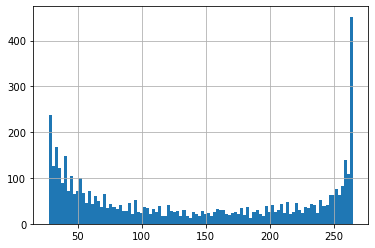

In [ ]:
sw = pd.DataFrame(final_df[(final_df['SW']==1)].iloc[:,:-5])
sw = sw.loc[:, (sw != 0).any(axis=0)]
print("Shape:" + str(sw.shape))
sw.sum().hist(bins=100)

In [ ]:
sw.sum().value_counts().sort_index(ascending=False).head(20)

265    240
264    132
263     80
262     61
261     48
260     50
259     45
258     44
257     38
256     44
255     39
254     23
253     23
252     29
251     23
250     32
249     31
248     19
247     27
246     16
dtype: int64

In [ ]:
sw.sum().value_counts().sort_index(ascending=True).head(20)

27    75
28    90
29    72
30    71
31    55
32    55
33    60
34    53
35    58
36    63
37    42
38    48
39    43
40    55
41    51
42    28
43    43
44    44
45    28
46    32
dtype: int64

In [ ]:
sw.sum().min()

27

In [ ]:
# CF to be dropped due to high appearance
threshold = 264
to_remove = (sw.sum() >= threshold)
cols_to_drop = to_remove[to_remove].index
print(str(len(cols_to_drop)) + " CF appear in almost all sample, to be removed.")
sw = sw.drop(cols_to_drop, axis=1)
sw.shape

372 CF appear in almost all sample, to be removed.


(265, 4563)

In [ ]:
sw.to_csv('sw_for_clustering.csv')

In [ ]:
import itertools 

def jaccard(labels1, labels2):
    """
    Computes the Jaccard similarity between two sets of clustering labels.
    The value returned is between 0 and 1, inclusively. A value of 1 indicates
    perfect agreement between two clustering algorithms, whereas a value of 0
    indicates no agreement. For details on the Jaccard index, see:
    http://en.wikipedia.org/wiki/Jaccard_index
    Example:
    labels1 = [1, 2, 2, 3]
    labels2 = [3, 4, 4, 4]
    print jaccard(labels1, labels2)
    @param labels1 iterable of cluster labels
    @param labels2 iterable of cluster labels
    @return the Jaccard similarity value
    """
    n11 = n10 = n01 = 0
    n = len(labels1)
    # TODO: Throw exception if len(labels1) != len(labels2)
    for i, j in itertools.combinations(range(n), 2):
        comembership1 = labels1[i] == labels1[j]
        comembership2 = labels2[i] == labels2[j]
        if comembership1 and comembership2:
            n11 += 1
        elif comembership1 and not comembership2:
            n10 += 1
        elif not comembership1 and comembership2:
            n01 += 1
    return float(n11) / (n11 + n10 + n01)

In [ ]:
df = pd.read_csv('results/interim_clustering_results_20220322.csv')
df1 = pd.read_csv('knn_jaccard.csv')
df['Jaccard_label'] = df1['Jaccard_label']
for i in ['BMM_label','KNN_label','Jaccard_label']:
    df[i].mask(df[i] == 'Least', 0, inplace=True)
    df[i].mask(df[i] == 'Less', 1, inplace=True)
    df[i].mask(df[i] == 'Average', 2, inplace=True)
    df[i].mask(df[i] == 'More', 3, inplace=True)
    df[i].mask(df[i] == 'Most', 4, inplace=True)
    
df.head()

,Unnamed: 0,sample_id,C10H10O5,C10H10O6,C10H10O7,C10H10O8,C10H11O5N,C10H11O6N,C10H12O5,C10H12O5N2,...,C9H20O5NS2P,C9H7O5N,C9H7O6N,C9H8O6S,C9H8O8,C9H9O6N,cluster,BMM_label,KNN_label,Jaccard_label
0,0,SW_S19S.0003_U_1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,3,4,3
1,1,SW_S19S.0003_U_2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,0,3,4,3
2,2,SW_S19S.0003_U_3,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,4,4,4,3
3,3,SW_S19S.0004_U_1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,1,4,4,4,3
4,4,SW_S19S.0004_U_2,1,1,1,1,1,1,1,1,...,0,1,0,0,1,1,4,4,4,3


In [ ]:
jaccard(df['BMM_label'], df['KNN_label'])

0.3456855831282017

In [ ]:
jaccard(df['BMM_label'], df['Jaccard_label'])

0.29016239430948865

In [ ]:
jaccard(df['Jaccard_label'], df['KNN_label'])

0.43150588895120584